# HOUSING: PRICE PREDICTION
Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [ ]:
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [143]:
# train data 
train=pd.read_csv('house train.csv')

In [144]:
# test data

test=pd.read_csv('house test.csv')

In [145]:
# combining both
df=pd.concat([train,test])

# EDA

In [149]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


Top 5 heads of the dataset.

In [150]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

3 float data type columns, 35 integer data  type columns and 43 object data type columns present in the dataset.

In [152]:
df.shape

(1460, 81)

In [153]:
# Checking null values top 50 columns

df.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In top 50 columns there is null values are present in some of the columns we will treat it later,

In [154]:
# checking null values on bottom 31 columns
df.isnull().sum().tail(31)

HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice         292
dtype: int64

Null values are present in many bottom 31 columns.

# Deleting unwanted columns

In [156]:
# Street column is same for all
del df['Street']

In [157]:
# Utilities column is same for all
del df['Utilities']

In [158]:
# most of the Heating column is same for all very few for others's
del df['Heating']

In [159]:
# Alley column because out of 1168 rows 1091 are null
del df['Alley']

In [160]:
# PoolQC column because out of 1168 rows 1161 are null
del df['PoolQC']

In [161]:
# Fence column because out of 1168 rows 931 are null
del df['Fence']

In [162]:
# MiscFeature column because out of 1168 rows 1124 are null
del df['MiscFeature']

In [155]:
# Deleting  PoolArea column because all values are 0 in the column
del df['PoolArea']

# Handling Null values 

In [163]:
df.dropna(inplace=True)

In [165]:
df.shape

(467, 73)

Now we have 467 rows and 7 columns present in the dataset.

# VISUALIZATION OF NOMINAL DATA BY COUNT PLOT

In [166]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,889,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,NAmes,...,207,0,0,224,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,...,130,0,0,0,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,NWAmes,...,122,0,0,0,0,1,2010,COD,Normal,190000.0
5,1197,60,RL,58.0,14054,IR1,Lvl,Inside,Gtl,Gilbert,...,17,0,0,0,0,11,2006,New,Partial,219210.0
7,1041,20,RL,88.0,13125,Reg,Lvl,Corner,Gtl,Sawyer,...,0,0,0,0,0,1,2006,WD,Normal,155000.0


RL         409
RM          41
FV          16
C (all)      1
Name: MSZoning, dtype: int64


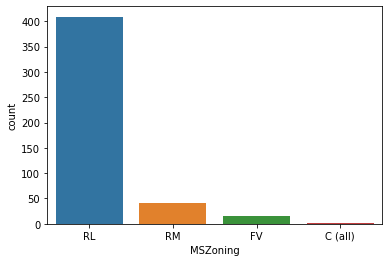

In [167]:
ax=sns.countplot(x='MSZoning',data=df)
print(df['MSZoning'].value_counts())

RL is more than the RM FV and  C (all).

Reg    280
IR1    169
IR2     14
IR3      4
Name: LotShape, dtype: int64


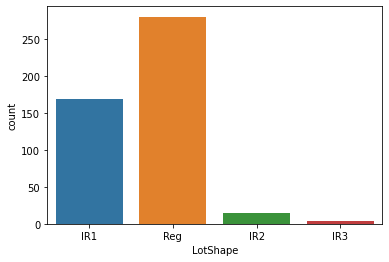

In [169]:
ax=sns.countplot(x='LotShape',data=df)
print(df['LotShape'].value_counts())

There is not much difference between Reg and IR1.

Lvl    416
HLS     26
Bnk     19
Low      6
Name: LandContour, dtype: int64


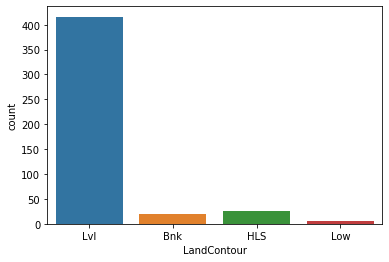

In [170]:
ax=sns.countplot(x='LandContour',data=df)
print(df['LandContour'].value_counts())

Lvl is maximum in numbers that is 416.

Inside     349
Corner      83
CulDSac     24
FR2         10
FR3          1
Name: LotConfig, dtype: int64


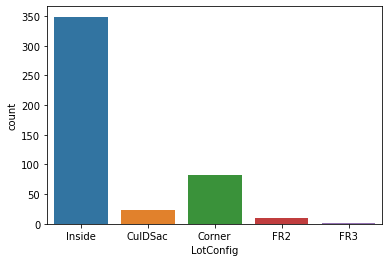

In [171]:
ax=sns.countplot(x='LotConfig',data=df)
print(df['LotConfig'].value_counts())

In LotConfig column Inside is showing maximum in numbers that is 349.

Gtl    443
Mod     21
Sev      3
Name: LandSlope, dtype: int64


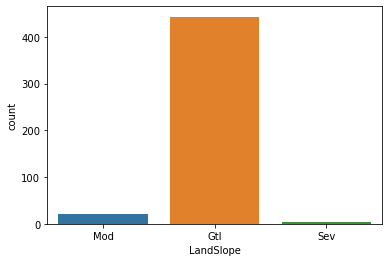

In [172]:
ax=sns.countplot(x='LandSlope',data=df)
print(df['LandSlope'].value_counts())

In LandSlope column, Gtl is maximum. 

Norm      406
Artery     20
Feedr      18
RRAn        9
PosN        8
PosA        2
RRAe        2
RRNn        2
Name: Condition1, dtype: int64


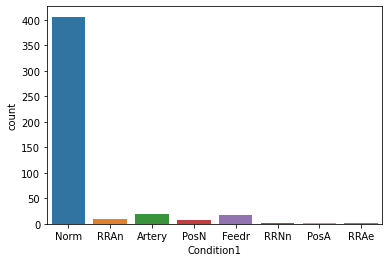

In [173]:
ax=sns.countplot(x='Condition1',data=df)
print(df['Condition1'].value_counts())

Norm is maximum in Condition1 column.

Norm      463
PosN        2
PosA        1
Artery      1
Name: Condition2, dtype: int64


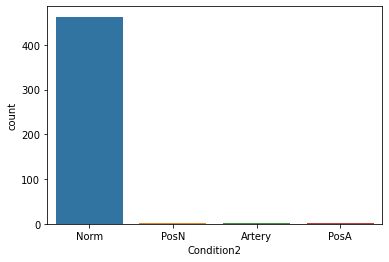

In [174]:
ax=sns.countplot(x='Condition2',data=df)
print(df['Condition2'].value_counts())

Norm is maximum in Condition2 column.

1Fam      409
TwnhsE     43
2fmCon      8
Twnhs       6
Duplex      1
Name: BldgType, dtype: int64


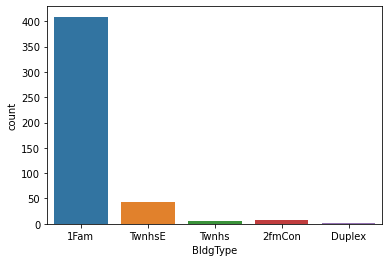

In [175]:
ax=sns.countplot(x='BldgType',data=df)
print(df['BldgType'].value_counts())

1Fam is maximum in BldgType column.

1Story    209
2Story    181
1.5Fin     43
SLvl       18
2.5Unf      6
2.5Fin      4
1.5Unf      3
SFoyer      3
Name: HouseStyle, dtype: int64


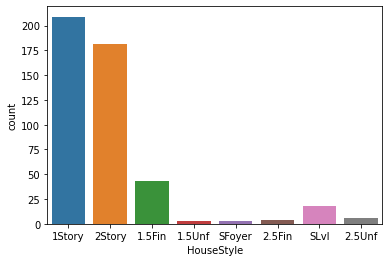

In [177]:
ax=sns.countplot(x='HouseStyle',data=df)
print(df['HouseStyle'].value_counts())

There is not much noticalble difference between 1Story and 2Story. 1Story is maximum in numbers.

Gable      334
Hip        121
Flat         5
Gambrel      4
Mansard      3
Name: RoofStyle, dtype: int64


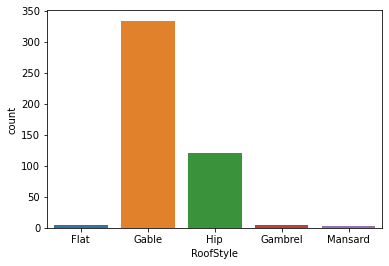

In [180]:
ax=sns.countplot(x='RoofStyle',data=df)
print(df['RoofStyle'].value_counts())

In RoofStyle column Gable is maximum.

CompShg    454
Tar&Grv      5
WdShngl      5
ClyTile      1
WdShake      1
Membran      1
Name: RoofMatl, dtype: int64


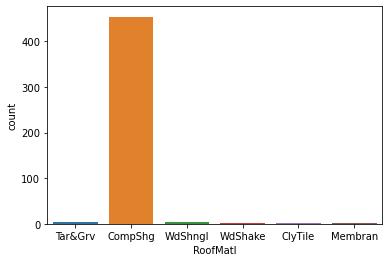

In [181]:
ax=sns.countplot(x='RoofMatl',data=df)
print(df['RoofMatl'].value_counts())

In RoofMatl column CompShg is maximum.

6     127
7     126
8      98
5      67
9      29
10     13
4       7
Name: OverallQual, dtype: int64


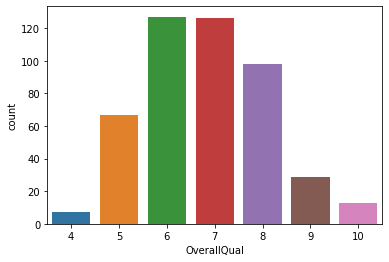

In [182]:
ax=sns.countplot(x='OverallQual',data=df)
print(df['OverallQual'].value_counts())

In OverallQual column 6 is maximum in numbers and there is not much difference between 6 and 7.

5    291
6     85
7     45
8     22
9     10
4      9
3      4
2      1
Name: OverallCond, dtype: int64


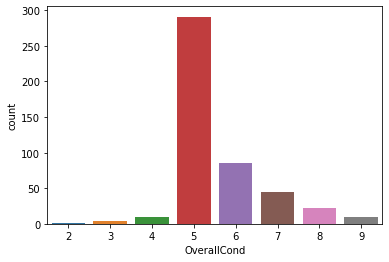

In [183]:
ax=sns.countplot(x='OverallCond',data=df)
print(df['OverallCond'].value_counts())

In OverallCond column 5 is maximum in numbers that is 291.

None       232
BrkFace    168
Stone       62
BrkCmn       5
Name: MasVnrType, dtype: int64


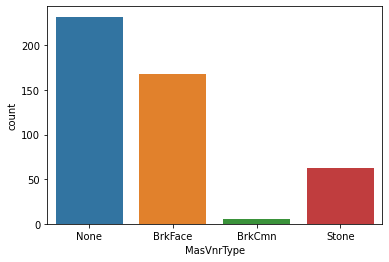

In [184]:
ax=sns.countplot(x='MasVnrType',data=df)
print(df['MasVnrType'].value_counts())

In MasVnrType column None is maximum that is 232 and there is not much difference between None and BrkFace.

TA    219
Gd    211
Ex     36
Fa      1
Name: ExterQual, dtype: int64


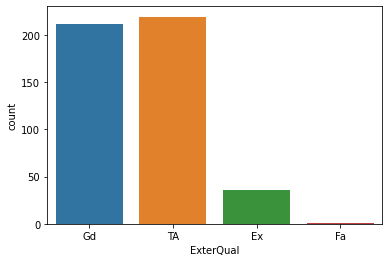

In [185]:
ax=sns.countplot(x='ExterQual',data=df)
print(df['ExterQual'].value_counts())

In ExterQual column there is not much noticable difference between TA and Gd.

TA    422
Gd     39
Fa      4
Ex      2
Name: ExterCond, dtype: int64


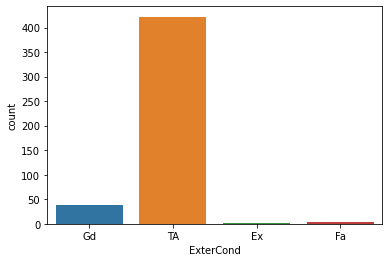

In [186]:
ax=sns.countplot(x='ExterCond',data=df)
print(df['ExterCond'].value_counts())

TA is maximun in ExterCond column.

PConc     254
CBlock    166
BrkTil     45
Stone       2
Name: Foundation, dtype: int64


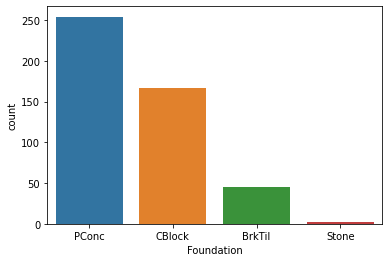

In [187]:
ax=sns.countplot(x='Foundation',data=df)
print(df['Foundation'].value_counts())

PConc is maximum in Foundation column and there is not much difference between PConc and CBlock.

Gd    225
TA    155
Ex     79
Fa      8
Name: BsmtQual, dtype: int64


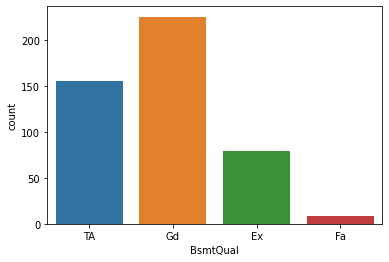

In [188]:
ax=sns.countplot(x='BsmtQual',data=df)
print(df['BsmtQual'].value_counts())

Gd is maximum in BsmtQual column.

TA    425
Gd     30
Fa     12
Name: BsmtCond, dtype: int64


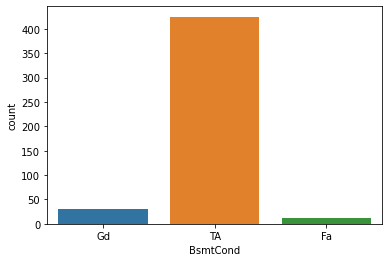

In [189]:
ax=sns.countplot(x='BsmtCond',data=df)
print(df['BsmtCond'].value_counts())

In BsmtCond column TA is maximum.

No    288
Av     79
Gd     56
Mn     44
Name: BsmtExposure, dtype: int64


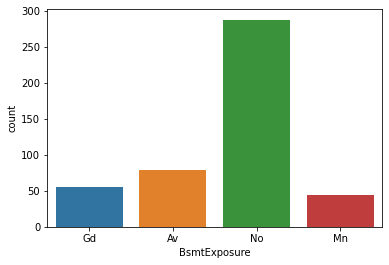

In [190]:
ax=sns.countplot(x='BsmtExposure',data=df)
print(df['BsmtExposure'].value_counts())

In BsmtExposure column No is maximum and there is not much difference between Av and Gd.

GLQ    163
Unf    138
ALQ     67
Rec     39
BLQ     39
LwQ     21
Name: BsmtFinType1, dtype: int64


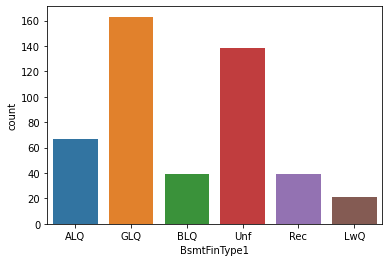

In [191]:
ax=sns.countplot(x='BsmtFinType1',data=df)
print(df['BsmtFinType1'].value_counts())

GLQ is maximum in BsmtFinType1 column.

Unf    414
LwQ     17
Rec     14
BLQ      9
GLQ      9
ALQ      4
Name: BsmtFinType2, dtype: int64


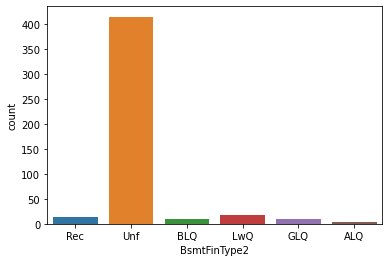

In [192]:
ax=sns.countplot(x='BsmtFinType2',data=df)
print(df['BsmtFinType2'].value_counts())

In BsmtFinType2 column Unf is maximum that is 414. 

The total number of GasA is 588 in Heating column and it is maximum.

Ex    289
TA    103
Gd     64
Fa     11
Name: HeatingQC, dtype: int64


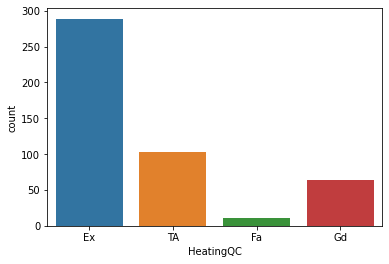

In [193]:
ax=sns.countplot(x='HeatingQC',data=df)
print(df['HeatingQC'].value_counts())

The total number of Ex is 289 and it is maximum in HeatingQC column.

Y    456
N     11
Name: CentralAir, dtype: int64


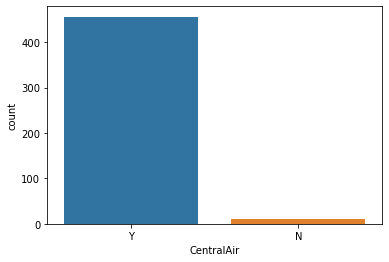

In [194]:
ax=sns.countplot(x='CentralAir',data=df)
print(df['CentralAir'].value_counts())

Y is indiacting yes in CentralAir column and it is maximum.

SBrkr    449
FuseA     15
FuseF      3
Name: Electrical, dtype: int64


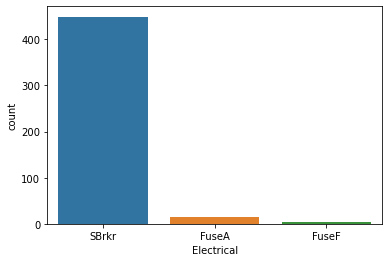

In [195]:
ax=sns.countplot(x='Electrical',data=df)
print(df['Electrical'].value_counts())

SBrkr is amximum in Electrical column that is 449.

0      461
572      1
232      1
360      1
384      1
392      1
420      1
Name: LowQualFinSF, dtype: int64


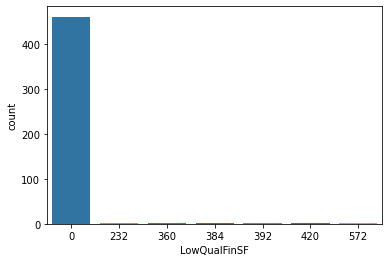

In [196]:
ax=sns.countplot(x='LowQualFinSF',data=df)
print(df['LowQualFinSF'].value_counts())

0 is maximum in LowQualFinSF column that is 461

0    264
1    197
2      6
Name: BsmtFullBath, dtype: int64


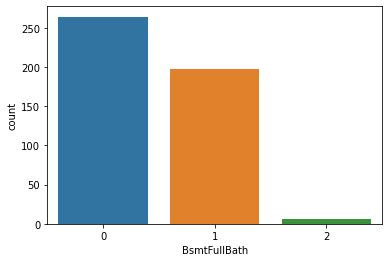

In [197]:
ax=sns.countplot(x='BsmtFullBath',data=df)
print(df['BsmtFullBath'].value_counts())

There is not much difference between 0 and 1 in BsmtFullBath column but 0 is maximum in numbers that is 264.

0    432
1     34
2      1
Name: BsmtHalfBath, dtype: int64


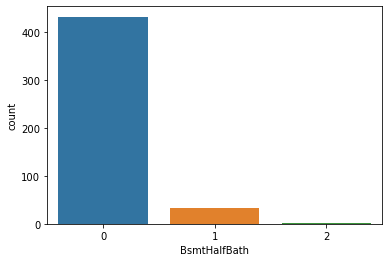

In [198]:
ax=sns.countplot(x='BsmtHalfBath',data=df)
print(df['BsmtHalfBath'].value_counts())

In BsmtHalfBath column 0 is maximum.

2    304
1    143
3     17
0      3
Name: FullBath, dtype: int64


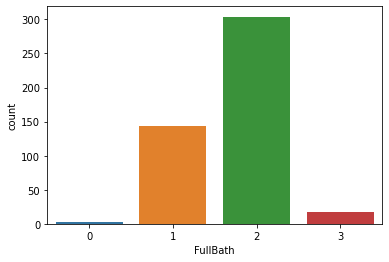

In [199]:
ax=sns.countplot(x='FullBath',data=df)
print(df['FullBath'].value_counts())

2 is indicating maximum in numbers that is 388 in FullBath column.

0    239
1    223
2      5
Name: HalfBath, dtype: int64


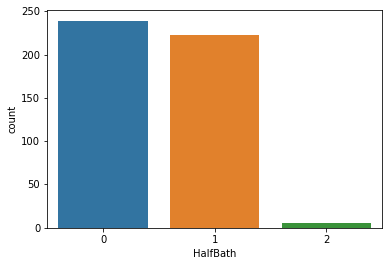

In [200]:
ax=sns.countplot(x='HalfBath',data=df)
print(df['HalfBath'].value_counts())

There is not much noticalble difference in 0 and 1 in HalfBath column.

3    265
4     94
2     84
1     15
5      7
0      2
Name: BedroomAbvGr, dtype: int64


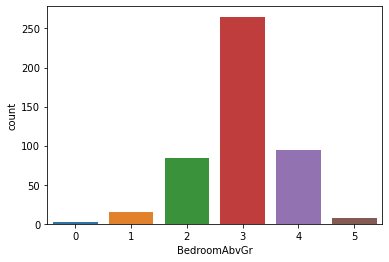

In [201]:
ax=sns.countplot(x='BedroomAbvGr',data=df)
print(df['BedroomAbvGr'].value_counts())

In BedroomAbvGr column 3 is maximum .

1    460
2      7
Name: KitchenAbvGr, dtype: int64


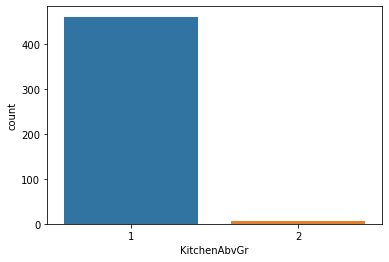

In [202]:
ax=sns.countplot(x='KitchenAbvGr',data=df)
print(df['KitchenAbvGr'].value_counts())

1 is 588 that is maximum in numbers in KitchenAbvGr column.

Gd    226
TA    168
Ex     68
Fa      5
Name: KitchenQual, dtype: int64


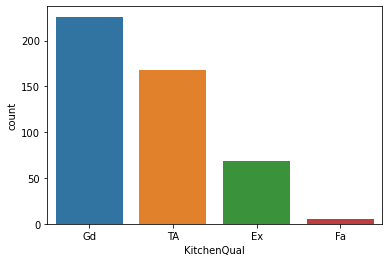

In [203]:
ax=sns.countplot(x='KitchenQual',data=df)
print(df['KitchenQual'].value_counts())

Gd is maximum that is 226 in KitchenQual column.

7     124
6     112
8      86
5      56
9      42
10     26
11     10
4       5
12      4
3       2
Name: TotRmsAbvGrd, dtype: int64


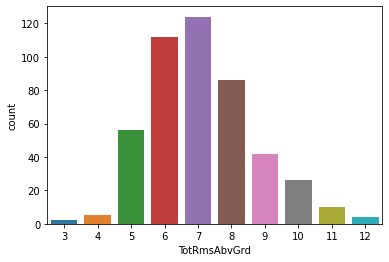

In [204]:
ax=sns.countplot(x='TotRmsAbvGrd',data=df)
print(df['TotRmsAbvGrd'].value_counts())

7 is maximum that is 124and in TotRmsAbvGrd column and there is not much differnce between 6 and 7.

Typ     440
Min2     11
Min1      8
Maj1      4
Mod       3
Maj2      1
Name: Functional, dtype: int64


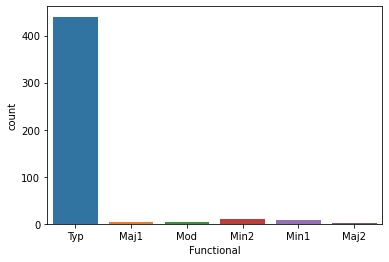

In [205]:
ax=sns.countplot(x='Functional',data=df)
print(df['Functional'].value_counts())

 Typ is maximum in  Functional column.

1    401
2     62
3      4
Name: Fireplaces, dtype: int64


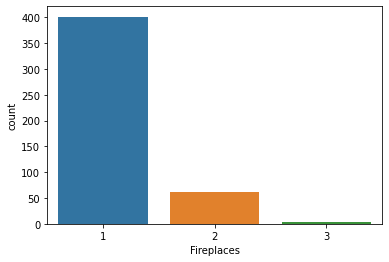

In [206]:
ax=sns.countplot(x='Fireplaces',data=df)
print(df['Fireplaces'].value_counts())

1 is maximum in Fireplaces column that is 401.

Gd    247
TA    173
Fa     19
Ex     18
Po     10
Name: FireplaceQu, dtype: int64


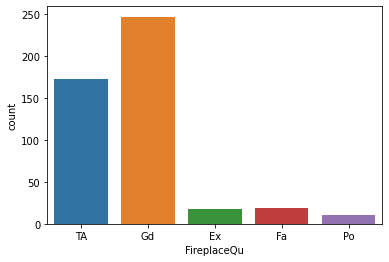

In [207]:
ax=sns.countplot(x='FireplaceQu',data=df)
print(df['FireplaceQu'].value_counts())

THere is not much differnce between Gd and TA in FireplaceQu column.

Attchd     335
Detchd      81
BuiltIn     43
Basment      7
CarPort      1
Name: GarageType, dtype: int64


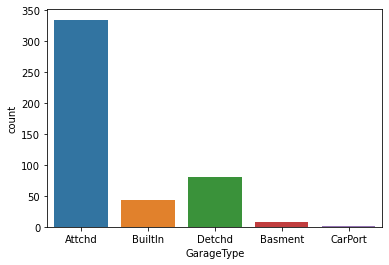

In [208]:
ax=sns.countplot(x='GarageType',data=df)
print(df['GarageType'].value_counts())

In GarageType column Attchd is maximum in numbers .

Fin    169
RFn    151
Unf    147
Name: GarageFinish, dtype: int64


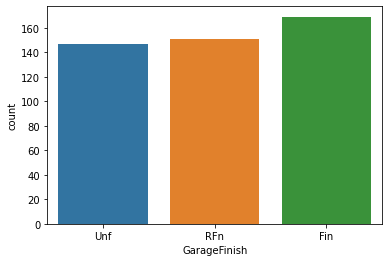

In [209]:
ax=sns.countplot(x='GarageFinish',data=df)
print(df['GarageFinish'].value_counts())

Fin, Rfn and Unf is looking normally distributed ,there is not much difference between them.

2    267
3    114
1     85
4      1
Name: GarageCars, dtype: int64


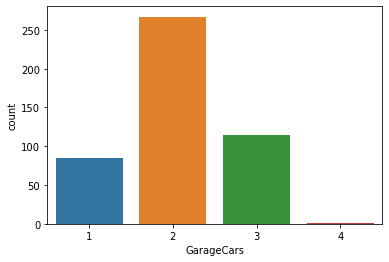

In [210]:
ax=sns.countplot(x='GarageCars',data=df)
print(df['GarageCars'].value_counts())

2 is maximum that is 372 in GarageCars column.

TA    445
Fa     13
Gd      7
Ex      2
Name: GarageQual, dtype: int64


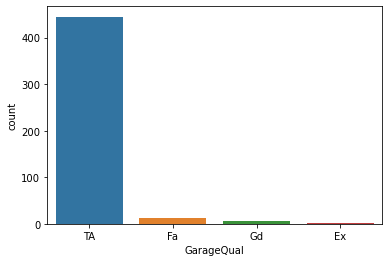

In [211]:
ax=sns.countplot(x='GarageQual',data=df)
print(df['GarageQual'].value_counts())

TA is maximum in GarageQual column.

TA    458
Fa      7
Po      1
Ex      1
Name: GarageCond, dtype: int64


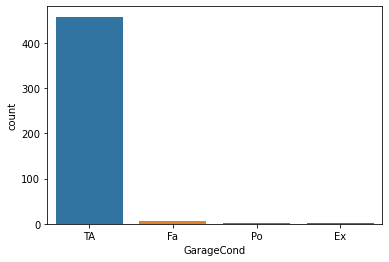

In [212]:
ax=sns.countplot(x='GarageCond',data=df)
print(df['GarageCond'].value_counts())

TA is maximum in GarageCond column.

Y    444
N     12
P     11
Name: PavedDrive, dtype: int64


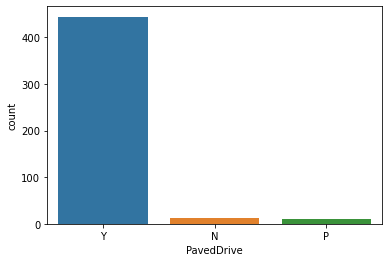

In [213]:
ax=sns.countplot(x='PavedDrive',data=df)
print(df['PavedDrive'].value_counts())

In PavedDrive column Y is maximum.

0      457
168      2
23       1
96       1
144      1
153      1
162      1
196      1
245      1
304      1
Name: 3SsnPorch, dtype: int64


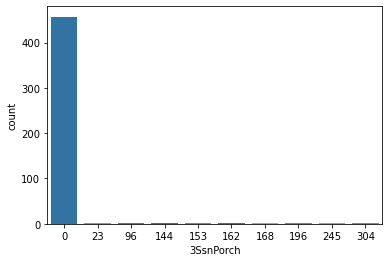

In [214]:
ax=sns.countplot(x='3SsnPorch',data=df)
print(df['3SsnPorch'].value_counts())

0 is maximum in 3SsnPorch column.

7     79
6     76
5     61
4     37
8     37
3     32
11    30
9     29
10    29
12    22
1     19
2     16
Name: MoSold, dtype: int64


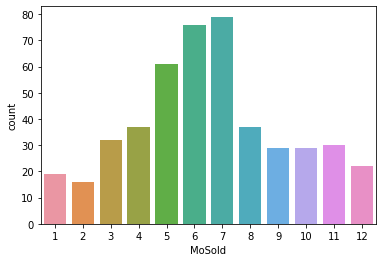

In [215]:
ax=sns.countplot(x='MoSold',data=df)
print(df['MoSold'].value_counts())

6 is showing maximum.

2007    114
2006    111
2009    102
2008     93
2010     47
Name: YrSold, dtype: int64


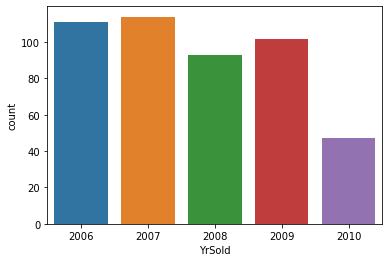

In [216]:
ax=sns.countplot(x='YrSold',data=df)
print(df['YrSold'].value_counts())

there is not much differnce between 2006,2007, 2008 and 2009 , In 2010 there is decrease in amount.

WD       380
New       72
COD        8
ConLw      2
CWD        2
ConLI      1
ConLD      1
Con        1
Name: SaleType, dtype: int64


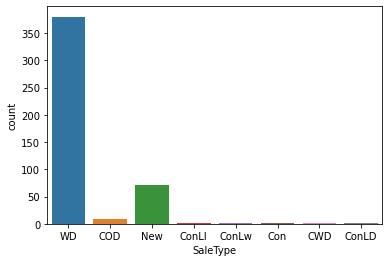

In [217]:
ax=sns.countplot(x='SaleType',data=df)
print(df['SaleType'].value_counts())

WD is maximum in SaleType column.

Normal     368
Partial     73
Abnorml     16
Family       8
Alloca       2
Name: SaleCondition, dtype: int64


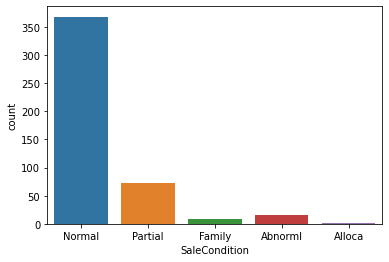

In [218]:
ax=sns.countplot(x='SaleCondition',data=df)
print(df['SaleCondition'].value_counts())

Normal is maximum in SaleCondition column.

# Visualization of Numerical data

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

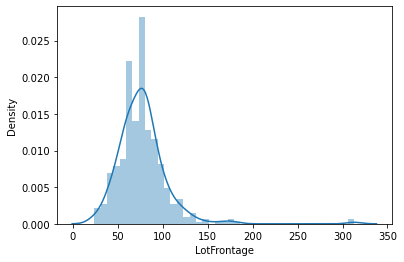

In [219]:
sns.distplot(df['LotFrontage'])

LotFrontage is looking left skewed and ranges in between 0 to 150.

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

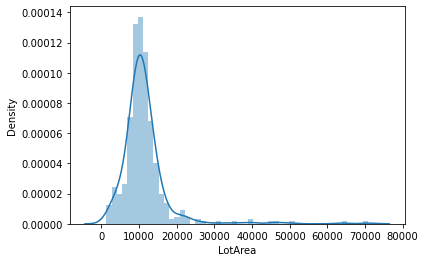

In [220]:
sns.distplot(df['LotArea'])

LotArea column is looking left skewed.

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

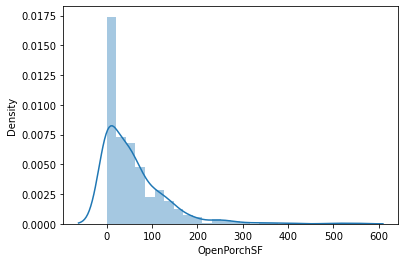

In [221]:
sns.distplot(df['OpenPorchSF'])

OpenPorchSF column is looking left skewed and its ranges in between 0 to 300.

<AxesSubplot:xlabel='Id', ylabel='Density'>

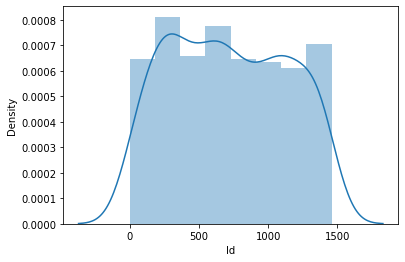

In [222]:
sns.distplot(df['Id'])

Id is looking normally distributed.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

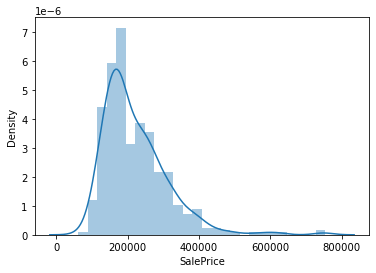

In [223]:
sns.distplot(df['SalePrice'])

Our traget column is SalePrice and its ranges in between approx 100000 to 800000.



 # Checking Outliers

Id                   AxesSubplot(0.125,0.71587;0.065678x0.16413)
MSSubClass        AxesSubplot(0.203814,0.71587;0.065678x0.16413)
LotFrontage       AxesSubplot(0.282627,0.71587;0.065678x0.16413)
LotArea           AxesSubplot(0.361441,0.71587;0.065678x0.16413)
OverallQual       AxesSubplot(0.440254,0.71587;0.065678x0.16413)
OverallCond       AxesSubplot(0.519068,0.71587;0.065678x0.16413)
YearBuilt         AxesSubplot(0.597881,0.71587;0.065678x0.16413)
YearRemodAdd      AxesSubplot(0.676695,0.71587;0.065678x0.16413)
MasVnrArea        AxesSubplot(0.755508,0.71587;0.065678x0.16413)
BsmtFinSF1        AxesSubplot(0.834322,0.71587;0.065678x0.16413)
BsmtFinSF2          AxesSubplot(0.125,0.518913;0.065678x0.16413)
BsmtUnfSF        AxesSubplot(0.203814,0.518913;0.065678x0.16413)
TotalBsmtSF      AxesSubplot(0.282627,0.518913;0.065678x0.16413)
1stFlrSF         AxesSubplot(0.361441,0.518913;0.065678x0.16413)
2ndFlrSF         AxesSubplot(0.440254,0.518913;0.065678x0.16413)
LowQualFinSF     AxesSubp

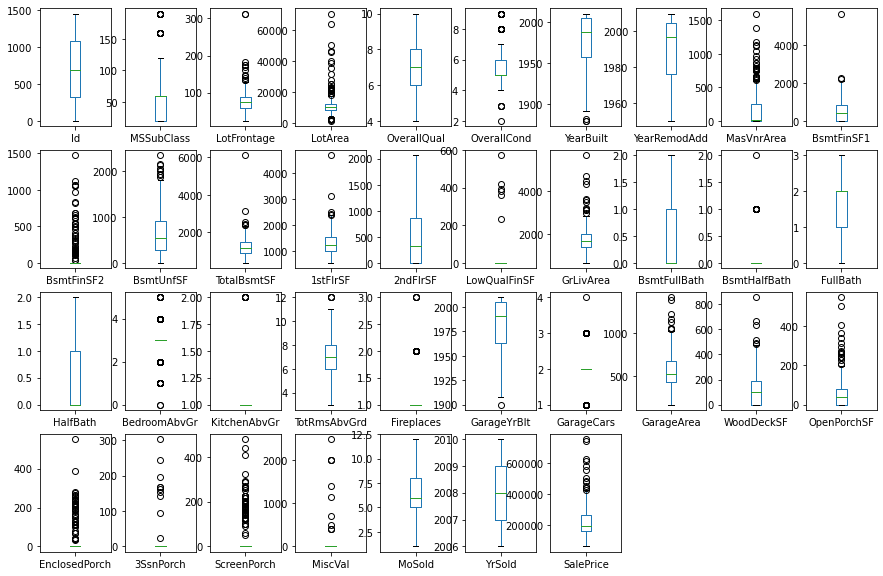

In [225]:
df.plot(kind='box', subplots=True ,layout=(4,10),figsize=(15,10))

Outliers are present in most of the columns we will treat it later.

# Checking Skewness

In [227]:
df.skew()

Id               0.070526
MSSubClass       1.395112
LotFrontage      2.956276
LotArea          4.503897
OverallQual      0.266342
OverallCond      1.261655
YearBuilt       -0.895796
YearRemodAdd    -0.903420
MasVnrArea       2.301589
BsmtFinSF1       2.222882
BsmtFinSF2       4.687205
BsmtUnfSF        0.916462
TotalBsmtSF      2.975403
1stFlrSF         1.659177
2ndFlrSF         0.523807
LowQualFinSF     9.494031
GrLivArea        1.853485
BsmtFullBath     0.482140
BsmtHalfBath     3.488490
FullBath        -0.350089
HalfBath         0.232178
BedroomAbvGr    -0.390756
KitchenAbvGr     8.008823
TotRmsAbvGrd     0.547152
Fireplaces       2.426133
GarageYrBlt     -0.864852
GarageCars      -0.023997
GarageArea       0.690656
WoodDeckSF       1.267913
OpenPorchSF      2.476073
EnclosedPorch    3.732162
3SsnPorch        8.095117
ScreenPorch      3.184993
MiscVal          8.733207
MoSold           0.111478
YrSold           0.202260
SalePrice        1.829225
dtype: float64

Skewness are also present in most of the columns , so we will treat it after outlier removal.

 # ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [228]:
from sklearn.preprocessing import OrdinalEncoder

enc =OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [230]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,889,20,2.0,95.0,15865,0.0,3.0,4.0,1.0,11.0,...,207,0,0,224,0,10,2007,7.0,3.0,268000.0
2,793,60,2.0,92.0,9920,0.0,3.0,1.0,0.0,14.0,...,130,0,0,0,0,6,2007,7.0,3.0,269790.0
3,110,20,2.0,105.0,11751,0.0,3.0,4.0,0.0,13.0,...,122,0,0,0,0,1,2010,0.0,3.0,190000.0
5,1197,60,2.0,58.0,14054,0.0,3.0,4.0,0.0,7.0,...,17,0,0,0,0,11,2006,6.0,4.0,219210.0
7,1041,20,2.0,88.0,13125,3.0,3.0,0.0,0.0,18.0,...,0,0,0,0,0,1,2006,7.0,3.0,155000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1458,70,2.0,66.0,9042,3.0,3.0,4.0,0.0,5.0,...,60,0,0,0,2500,5,2010,7.0,3.0,266500.0
1146,1388,50,3.0,60.0,8520,3.0,3.0,4.0,0.0,16.0,...,15,0,0,0,0,8,2007,1.0,2.0,136000.0
1150,679,20,2.0,80.0,11844,0.0,3.0,4.0,0.0,21.0,...,82,0,0,0,0,7,2009,6.0,4.0,372500.0
1154,168,60,2.0,86.0,10562,3.0,3.0,4.0,0.0,15.0,...,120,0,0,0,0,11,2007,6.0,4.0,325624.0


 Now columns has been converted into numeric data.

# Outlier Removal

In [30]:
from scipy.stats import zscore

In [231]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  0,   0,   0,   2,   4,   4,   4,   5,   5,   7,   8,   9,  10,
         10,  11,  11,  16,  17,  18,  20,  20,  20,  20,  24,  27,  28,
         29,  33,  35,  35,  35,  35,  35,  35,  35,  37,  41,  42,  43,
         43,  43,  43,  43,  44,  44,  46,  48,  48,  48,  49,  50,  51,
         51,  51,  51,  52,  52,  54,  55,  56,  56,  56,  57,  57,  58,
         59,  61,  63,  63,  63,  64,  65,  65,  65,  68,  68,  68,  71,
         72,  72,  72,  76,  81,  82,  84,  85,  88,  88,  88,  89,  89,
         90,  90,  90,  91,  91,  95,  95,  95,  95,  96,  97, 101, 110,
        110, 110, 112, 114, 114, 117, 118, 119, 125, 125, 127, 129, 131,
        139, 139, 141, 141, 141, 141, 141, 141, 141, 141, 142, 142, 143,
        143, 143, 150, 153, 153, 155, 155, 155, 155, 156, 156, 160, 162,
        163, 163, 163, 163, 163, 163, 163, 165, 167, 167, 167, 168, 169,
        171, 171, 172, 174, 174, 175, 175, 178, 178, 180, 183, 187, 189,
        190, 191, 194, 194, 196, 197, 198, 201, 205

In [233]:
df_new=df[(z<3).all(axis=1)]
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,793,60,2.0,92.0,9920,0.0,3.0,1.0,0.0,14.0,...,130,0,0,0,0,6,2007,7.0,3.0,269790.0
5,1197,60,2.0,58.0,14054,0.0,3.0,4.0,0.0,7.0,...,17,0,0,0,0,11,2006,6.0,4.0,219210.0
11,833,60,2.0,44.0,9548,0.0,3.0,1.0,0.0,4.0,...,39,0,0,0,0,1,2010,7.0,3.0,237000.0
30,46,120,2.0,61.0,7658,3.0,3.0,4.0,0.0,15.0,...,82,0,0,0,0,2,2010,7.0,3.0,319900.0
31,426,60,3.0,60.0,3378,3.0,1.0,4.0,0.0,16.0,...,0,126,0,0,0,9,2009,7.0,3.0,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1107,20,2.0,114.0,10357,0.0,3.0,0.0,0.0,19.0,...,244,0,0,0,0,5,2007,7.0,3.0,179900.0
1143,1257,20,2.0,91.0,14303,0.0,3.0,0.0,0.0,14.0,...,36,0,0,0,0,8,2008,7.0,3.0,301500.0
1150,679,20,2.0,80.0,11844,0.0,3.0,4.0,0.0,21.0,...,82,0,0,0,0,7,2009,6.0,4.0,372500.0
1154,168,60,2.0,86.0,10562,3.0,3.0,4.0,0.0,15.0,...,120,0,0,0,0,11,2007,6.0,4.0,325624.0


226 rows has been removed as an outliers.

# Remoinvg skewness

In [234]:
df.skew()

Id               0.070526
MSSubClass       1.395112
MSZoning         0.379044
LotFrontage      2.956276
LotArea          4.503897
                   ...   
MoSold           0.111478
YrSold           0.202260
SaleType        -5.017724
SaleCondition   -2.458865
SalePrice        1.829225
Length: 73, dtype: float64

Most of the skewness has been removed during a outlier removal, so will not treat it because may be we can loose our datasets.

# SEPRATING THE COLUMNS INTO FEATURES AND TARGET

In [246]:
df_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [255]:
x =df_new.loc[:,['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

In [256]:
y=df_new['SalePrice']
y.head()

2     269790.0
5     219210.0
11    237000.0
30    319900.0
31    135000.0
Name: SalePrice, dtype: float64

# Lets bring all features to a common scale


In [268]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df_new)

x=pd.DataFrame(x,columns=df_new.columns)

# TRAIN TEST SPLIT

In [270]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=47)

# Model Building

In [271]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [272]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 9.269370659165187e-11
mean squared error 1.4321238563679728e-20
root mean squared error 1.1967137737855166e-10


In [273]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))


cv score 1.0


r2 score is 100% and cv score is 100% for linear regression

​

# REGULARIZATION

In [274]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.999999065319511
error
mean absolute error 47.48771754105329
mean squared error 4586.347404668335
root mean squared error 67.72257677221337


In [275]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.999999615229482


r2 score is 99% and cv score is 99%.

In [276]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9974108052640651
error
mean absolute error 2240.388535601391
mean squared error 12704819.129549272
root mean squared error 3564.3820122917905


In [277]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.999493202278002


In [278]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.8625026920920887
error
mean absolute error 15881.276799281255
mean squared error 674680202.120531
root mean squared error 25974.606871337455


In [279]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9185866905224442


r2 score is 86% and cv score is 91%.

Our most of the model is predicting 99% r2 score after cross validation its means model is performing well.

# HYPER PARAMETER TUNING

In [286]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [287]:

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[0,5]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto'}


# Final Model

In [288]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 98.41999677826145
cross val score: 99.64352487135739


# SAVING THE MODEL

In [292]:
import pickle
filename='house_price_new.pkl'
pickle.dump(rf, open(filename, 'wb'))

# PREDICTING ON TEST DATA

In [303]:
y_prediction=rf.predict(X_test)
r2_score(y_test,y_prediction)

0.9841999677826144


# SAVING THE RESULT ON THE CSV FILE

In [128]:
result=pd.DataFrame()


result["Fare"]=y_prediction
result=result.sort_index()
result.to_csv('house_sale_price1.csv',index=True)
              

In [130]:
# Now Loding the data
ds=pd.read_csv('house_sale_price1.csv')
ds

,Unnamed: 0,Fare
0,0,157585.758636
1,1,170027.001308
2,2,230498.711261
3,3,439998.873210
4,4,176391.212217
...,...,...
89,89,178993.603431
90,90,194963.008204
91,91,325192.672743
92,92,259963.755697
